A:
[[1 0]
 [0 2]]
b:
[[3]
 [4]]
exact solution using numpy:
[[3.]
 [2.]]
the approx solution is: [3.00000004 2.        ]
iterations:
12


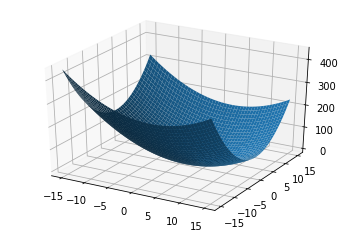

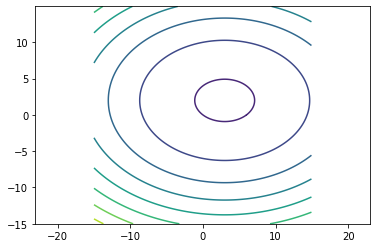

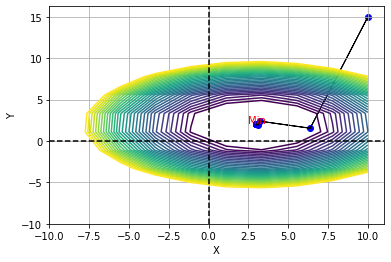

In [4]:
"""
Created on Fri Nov 01 17:09:59 2019

@author: andresryes
"""

#Imports 
import numpy as np
from numpy import linalg
import scipy as sp
from scipy import optimize
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sympy import symbols, diff

#we receive a 2x2 matrix
A = np.matrix([[2, 1],[1,2]])
B = np.matrix([[1, 0],[0,2]])
C = np.matrix([[5, 1],[1,4]])

A = B
#vector b 2x1
b = np.matrix([[3], [4]])
u,v = symbols('u v', real=True)
print("A:")
print(A)
print("b:")
print(b)

#function
#f = A.A1[3]*v
#print(diff(f, v))

#print(diff(f1, v))
#print(gradientef([1,1]))
#using the linalg library
print("exact solution using numpy:")
print(linalg.solve(A,b))
# F(x) = (1/2)x · Ax − b · x

#Steepest Descent 
#this is the function we are going to optimize, based on the original matrix F(x) = 1/2 x^t · Ax − b · x^t
def f(x):
    u = x[0]
    v = x[1]
    return 0.5*(u*(u*A.A1[0] + v*A.A1[2]) + v*(u*A.A1[1] + v*A.A1[3])) - b.A1[0]*u - b.A1[1]*v

#the gradient of the previous function, it indicates the direction
def gradientef(x):
    u,v = symbols('u v', real=True)
    f1 = 0.5*(u*(u*A.A1[0] + v*A.A1[2]) + v*(u*A.A1[1] + v*A.A1[3])) - b.A1[0]*u - b.A1[1]*v
    du = str(diff(f1, u))
    dv = str(diff(f1, v))
    u = x[0]
    v = x[1]
    y=[eval(du),eval(dv)]
    return y  

#alpha function of one variable, indicates the step in each iteration/jump
def funcion(alpha,x,s):
    u = x[0]+alpha*s[0]
    v = x[1]+alpha*s[1]
    y1 = 0.5*(u*(u*A.A1[0] + v*A.A1[2]) + v*(u*A.A1[1] + v*A.A1[3])) - b.A1[0]*u - b.A1[1]*v
    return y1

#this is the method itself, receives xk first guess, the function, tolerance
def desc(xk,f,tol):
    #initial error
    error=1
    #this is the array with all the dots to graphic 
    X=[]
    #array with all vectors 
    S=[]
    #append to the dots array the initial guess
    X.append(xk)
    #make this algorithm while the error is still bigger than the tolerance 
    #level
    while(error>tol):
        #calculates the first direction of the steepest descent using the 
        #negative of the gradient
        sk=np.dot(-1.0,gradientef(xk))  
        #optimizes alpha funciton using Golden Ration optimization of Python
        ak1=sp.optimize.golden(funcion,args=(xk,sk))
        #getting the direction using the step size
        sk_n=np.dot(ak1,sk)
        #append the direction
        S.append(sk_n)
        #calculating our new xk+1
        xk1=xk+np.dot(ak1,sk)
        #append the new dot
        X.append(xk1)
        #calculating the error
        error=np.linalg.norm(xk1-xk)
        #changing xk to the new value
        xk=xk1
    return xk,X,S

y=desc([10, 15],f,0.0000001)
print("the approx solution is: "+str(y[0]))
Xk=y[1] 
Sk=y[2] 
print("iterations:")
print(len(Sk))

X1=[]
Y1=[]
Z1=[]

#graphic the coordinates
for i in range(len(Xk)):
    X1.append(Xk[i][0])
    Y1.append(Xk[i][1])

#graphic in 3d
fig = plt.figure()
ax = fig.gca(projection="3d")

#graphing the level curves
u, v = np.meshgrid(np.arange(-15, 15.0, 0.05), np.arange(-15.0, 15.0, 0.05))
fmesh = 0.5*(u*(u*A.A1[0] + v*A.A1[2]) + v*(u*A.A1[1] + v*A.A1[3])) - b.A1[0]*u - b.A1[1]*v
ax.plot_surface(u, v, fmesh)
fig2=plt.figure()
plt.axis("equal")
plt.contour(u, v, fmesh)
plt.show()

#graphing the evolution of the solution 
   
#defining the axis
X_1=np.linspace(-10,10,10)
Y_1=np.linspace(-10,10,10)
plt.axvline(x=0, color= 'k', linestyle = '--')
plt.axhline(y=0, color= 'k', linestyle = '--')

#tags
plt.xlabel("X")
plt.ylabel("Y")

#cuadriculate
plt.grid(True)

#calculate the X, Y, Z for meshgrid
X_2,Y_2=np.meshgrid(X_1,Y_1)

#function
Z_1 = f([X_2, Y_2])
A=np.linspace(1,50,2**5)

#to get the tag 'min' in the solution 
plt.annotate('Min', xy=(y[0][0]-0.5,y[0][1]+0.1),color='red')

for i in range(len(Sk)):
    plt.arrow(Xk[i][0],Xk[i][1],Sk[i][0],Sk[i][1],head_width=0.05,head_length=0.05)
    plt.scatter(Xk[i][0],Xk[i][1],color='blue')
plt.contour(X_1,Y_1,Z_1,A)
plt.show()

In [0]:
#Recibimos una matriz 2x2
A = np.matrix([[1, 0],[0,2]])
#un vector resultado b 2x1
b = np.matrix([[3], [4]])
u,v = symbols('u v', real=True)
print(A)
print(b)

#function
f = A.A1[3]*v
from sympy import symbols, diff
print(diff(f, v))

f1 = 0.5*(u*(u*A.A1[0] + v*A.A1[2]) + v*(u*A.A1[1] + v*A.A1[3])) - b.A1[0]*u - b.A1[1]*v
print(diff(f1, v))

#Respuesta
print(linalg.solve(A,b))
# F(x) = (1/2)x · Ax − b · x

[[1 0]
 [0 2]]
[[3]
 [4]]
2
2.0*v - 4
[[3.]
 [2.]]


In [0]:
#Recibimos una matriz 2x2
A = np.matrix([[2, 1],[1,2]])
#un vector resultado b 2x1
b = np.matrix([[4], [6]])
u,v = symbols('u v', real=True)
print(A)
print(b)
def gradientef(x):
    u,v = symbols('u v', real=True)
    f1 = 0.5*(u*(u*A.A1[0] + v*A.A1[2]) + v*(u*A.A1[1] + v*A.A1[3])) - b.A1[0]*u - b.A1[1]*v
    du = str(diff(f1, u))
    dv = str(diff(f1, v))
    print(du)
    u = x[0]
    v = x[1]
    y=[eval(du),eval(dv)]
    return y  

gradientef([3, 2])

[[2 1]
 [1 2]]
[[4]
 [6]]
2.0*u + 1.0*v - 4


[4.0, 1.0]